

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from census.gov.
● The NICS data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.
● The U.S. census data is found
in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one
year.

> 

# Questions to answer:
 


# 1-What census data is most associated with high gun per capita?


# 2-Which states have had the highest growth in gun registrations?


# 3-What is the overall trend of gun purchases?

In [1]:
# import all the needed libraries 

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Loading the data and print out the head and performing operations to inspect data
# The NICS data It contains the number of firearm checks by month, state, and type.
# The U.S. census data  It contains several variables at the state level.


# Gathering Data

In [4]:
#The NICS data(gun-data) is found in one sheet of an .xlsx file.


#The U.S. census data(census_data) is found in a .csv file.


In [5]:
# NICS data 

df_gun = pd.read_excel('gun-data.xlsx')

In [6]:
# Returns the first 5 rows of the NICS data
df_gun.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [7]:
#Returns the last 5 rows of the NICS data
df_gun.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [8]:
# U.S.census data
df_census=pd.read_csv('census_data.csv')

In [9]:
# Returns the first 5 rows of the U.S.census data
df_census.head()


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [10]:
#Returns the last 5 rows of the U.S.census data
df_census.tail()


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# understand and expoler data

# Assessing data
check the issues that comes with data quality or data structure
https://drive.google.com/file/d/1hqrBQCAszLWtKF1VMKsqfoXmYhDodU7Q/view?usp=sharing

# NICS data

In [12]:
#Get the number of rows and columns in NICS data
df_gun.shape

(12485, 27)

In [13]:
#The data type of each column in NICS data
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [14]:
# a concise summary of NICS data
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [15]:
#number of unique elements in the NICS data
df_gun.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [16]:
#identify the missing values in the NICS data
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [17]:
#count of duplicates in NICS data
sum(df_gun.duplicated())

0

In [18]:
#calculating some statistical data in NICS data
df_gun.describe()


,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


statistical data
*mean, which calculates the mean of each column. 
*std, which calculates standard deviation of the values of each column.
*min and max, which are the minimum and miximum value respectively in each column. 
*25%, 50% and 75% are the Quartile of each column, 25% is the lower percentile, 50% percentile is same as the median, and 75% is the upper percentile



# U.S. census data

In [19]:
#Get the number of rows and columns in U.S. census data
df_census.shape

(85, 52)

In [20]:
#The data type of each column in U.S.census data
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [21]:
# a concise summary of U.S.census data
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [22]:
#number of unique elements in the U.S.census data
df_census.nunique()


Fact              80
Fact Note         15
Alabama           65
Alaska            64
Arizona           64
Arkansas          64
California        63
Colorado          64
Connecticut       63
Delaware          64
Florida           64
Georgia           64
Hawaii            63
Idaho             63
Illinois          65
Indiana           63
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             64
Maryland          64
Massachusetts     65
Michigan          64
Minnesota         65
Mississippi       65
Missouri          64
Montana           65
Nebraska          65
Nevada            63
New Hampshire     65
New Jersey        65
New Mexico        64
New York          65
North Carolina    65
North Dakota      63
Ohio              64
Oklahoma          64
Oregon            63
Pennsylvania      65
Rhode Island      64
South Carolina    65
South Dakota      65
Tennessee         64
Texas             64
Utah              64
Vermont           63
Virginia     

In [23]:
#identify the missing values in the U.S.census data
df_census.isnull().sum()


Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [24]:
#count of duplicates in U.S.census data
sum(df_census.duplicated())


3

In [25]:
#calculating some statistical data in U.S.census data
df_census.describe()


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"White alone, percent, July 1, 2016, (V2016)",(c),"57,746,565",7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,433,0.048,50.40%,2.50%,1.90%,7.70%,2.56,1.50%,"54,157.80",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


Statistical Data
*count, which counts the number of non-null values in each field.
*unique, which is the number of unique values in each column. 
*top, which is the most common value.
*freq, which is the most common value's frequency.



                 

### Data Cleaning ( is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database )



data cleaning documentation
#Making a copy of (NICS data and U.S.census data) the original dataset 
#convert the 'month' column from string to datetime format in NICS copy data
#droping 'fact note' column from U.S.census data
#setting 'Fact' column as an index in U.S.census data
#transpose rows and columns of the U.S.census data
#resetting the index of the U.S.census data
#renameing the 'index' column to 'state' in U.S.census data
#removing the missing data columns (NAN till the column Z )in the U.S.census data
#Drop state which have "totals" missing value in NICS data 
#drop duplicates in the "state" in the NICS data .
#the state of NICS data and state of U.S.census data to compare them and know what is the states
 that not found in  U.S.census data
#Drop a state that found in the NICS data and not found in U.S.census data
   










In [26]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [27]:
#Making a copy of the original dataset
df_gun1=df_gun.copy()
df_census1=df_census.copy()


When cleaning and wrangling data, it can be helpful to retain the original imported data frame without changes. This allows you the opportunity to compare your changes to the original data frame to check your work as you clean the data.



In [28]:
# Returns the first 5 rows of the  NICS copy data

df_gun1.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [29]:
# Returns the first 5 rows of the U.S.census copy data
df_census1.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [30]:
# Checking the Data Type of 'month' Column in NICS copy data
print (df_gun1['month'].dtypes)

object


In [31]:
# convert the 'month' column to datetime format in NICS copy data

df_gun1['month'] = pd.to_datetime(df_gun1['month'])


In [32]:
# Check the format of 'month' column in NICS copy data
print (df_gun1['month'].dtypes)

datetime64[ns]


In [33]:
#dropping 'fact note' column from U.S.census copy data
df_census1=df_census1.drop('Fact Note',axis=1)



dropping of fact note column because it has 57 missing value of  total 85 .


In [34]:
#Set the DataFrame index using existing columns.
#setting 'Fact' column as an index in U.S.census copy data

df_census1.set_index('Fact',inplace=True)


In [35]:
df_census1.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [36]:
#transpose index and columns of the U.S.census copy data
df_census1=df_census1.T


In [37]:
df_census1.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Pandas DataFrame.transpose() function transpose index and columns of the dataframe. It reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa.
 https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php#:~:text=The%20transpose()%20function%20is,as%20columns%20and%20vice%2Dversa.&text=If%20True%2C%20the%20underlying%20data,copy%20is%20made%20if%20possible.


In [38]:
# resetting the index

df_census1 = df_census1.reset_index()


In [39]:
df_census1.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


reset_index() function generate a new DataFrame or Series with the index reset. This comes handy when index is need to be used as a column.

https://www.geeksforgeeks.org/python-pandas-series-reset_index/

In [40]:
#renameing the 'index' column to 'state' in U.S.census copy data
df_census1=df_census1.rename(columns={'index':'State'})

In [41]:
df_census1.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#check missing value
df_census1.isnull().sum()

Fact
State                                                                                     0
Population estimates, July 1, 2016,  (V2016)                                              0
Population estimates base, April 1, 2010,  (V2016)                                        0
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     0
Population, Census, April 1, 2010                                                         0
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    0
Persons under 5 years, percent, April 1, 2010                                             0
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   0
Persons under 18 years, percent, April 1, 2010                                            0
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                               0
Persons 65 years and over, percent, April 1, 2010                          

there is a missing data in columns NAN till the column Z  
so i will remove these column by their column number 
first get their column number and then remove them

In [43]:
# find the columns number in U.S.census copy data 
col_name = "FIPS Code"
index_no = df_census1.columns.get_loc(col_name) 
print("Index of {} column in given dataframe is : {}".format(col_name, index_no))


Index of FIPS Code column in given dataframe is : 65


In [44]:
col_name2 = "Z"
index_no = df_census1.columns.get_loc(col_name2) 
print("Index of {} column in given dataframe is : {}".format(col_name2, index_no))


Index of Z column in given dataframe is : 85


the columns of U.S.census copy data from 66:85 have missing value so i will dropping them

In [45]:
# dropping the columns have missing value
df_census1.drop(df_census1.iloc[:, 66:86], inplace = True, axis = 1)


In [46]:
df_census1.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [47]:
#check again for missing value
df_census1.isnull().sum().any()

False

 There's no missing value.



since i have the column 'state' is common with the NICS data and U.S.census data so i will make a copy of state only for comparison and extraction  

In [48]:
#creating a new column 'state1' of state column in NICS data .
gun=df_gun1.copy()
gun['state1'] = pd.Series(gun.iloc[:,1])
gun



,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,state1
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,Alabama
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,Alaska
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,Arizona
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,Arkansas
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,California
5,2017-09-01,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873,Colorado
6,2017-09-01,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117,Connecticut
7,2017-09-01,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502,Delaware
8,2017-09-01,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,District of Columbia
9,2017-09-01,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390,Florida


In [49]:
# Drop rows which contain missing values.
gun=gun.dropna()


Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values. By default, this function returns a new DataFrame and the source DataFrame remains unchanged.


In [50]:
#drop all columns expect the state1 column in NICS data
gun1=gun.drop(gun.loc[:, 'month':'totals'].columns, axis = 1) 
gun1


,state1
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District of Columbia
9,Florida


In [51]:
#remove duplicates
gun1.drop_duplicates(inplace=True)
gun1

,state1
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District of Columbia
9,Florida


In [52]:
gun1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 1 columns):
state1    55 non-null object
dtypes: object(1)
memory usage: 880.0+ bytes


In [53]:
#creating a new column'state2' of state column in U.S.census data .
census=df_census1.copy()
census['state2'] = pd.Series(census.iloc[:,0])
census


Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,state2
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01""",Alabama
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02""",Alaska
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04""",Arizona
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05""",Arkansas
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06""",California
5,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08""",Colorado
6,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09""",Connecticut
7,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10""",Delaware
8,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12""",Florida
9,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,"480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13""",Georgia


In [54]:
# Drop rows which contain missing values.
census=census.dropna()


In [55]:
#drop all columns expect the state2 column in U.S.census data
census1=census.drop(census.loc[:, 'State':'FIPS Code'].columns,axis=1) 
census1

Fact,state2
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [56]:
#remove duplicates
census1.drop_duplicates(inplace=True)
census1

Fact,state2
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [57]:
census1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 1 columns):
state2    50 non-null object
dtypes: object(1)
memory usage: 800.0+ bytes


In [58]:
len(gun1)

55

In [59]:
len(census1)

50

so there is 5 state that found in NICS data and not found in U.S.census data
 i will merge the data to compare them and know what is the states that not found in  U.S.census data

In [60]:
# merging the two datasets 'state1' and 'state2'
state3 = gun1.merge(census1, how='left', left_on=['state1'], right_on=['state2'])
state3

,state1,state2
0,Alabama,Alabama
1,Alaska,Alaska
2,Arizona,Arizona
3,Arkansas,Arkansas
4,California,California
5,Colorado,Colorado
6,Connecticut,Connecticut
7,Delaware,Delaware
8,District of Columbia,NaN
9,Florida,Florida


In [61]:
#the state that found in NICS data and not found in U.S.census data 
gun1[state3['state2'].isna()]


,state1
8,District of Columbia
11,Guam
21,Mariana Islands
41,Puerto Rico
49,Virgin Islands


In [62]:
#Drop a row if it contains a certain value in the NICS data 
#(“District of Columbia,Guam,Mariana Islands,Puerto Rico,Virgin Islands”) which not in U.S.census 
df_gun1[df_gun1.state !="District of Columbia" ]
df_gun1[df_gun1.state !="Guam"]
df_gun1[df_gun1.state !="Mariana Islands"]
df_gun1[df_gun1.state !="Puerto Rico"]
df_gun1[df_gun1.state !="Virgin Islands"]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09-01,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09-01,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09-01,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09-01,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09-01,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


Drop a row if it contains a certain value(“District of Columbia,Guam,Mariana Islands,Puerto Rico,Virgin Islands”) from column state in NICS data because these value found in state of NICS data and not found in state of U.S.census data 
so the state found in the NICS data will be the same state found in the U.S.census data

https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/


create new dataframe from U.S.census data using the columns "state","Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"


In [63]:
# dataframe of "state" and "Population estimates, July 1, 2016  
census3= df_census1[['State', 'Population estimates, July 1, 2016,  (V2016)']]
census3.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [64]:
census3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
State                                           50 non-null object
Population estimates, July 1, 2016,  (V2016)    50 non-null object
dtypes: object(2)
memory usage: 880.0+ bytes


In [65]:
#Population estimates, July 1, 2016,  (V2016) data is object i will convert it into float  

census3['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)
census3['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(census3['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')
census3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
State                                           50 non-null object
Population estimates, July 1, 2016,  (V2016)    50 non-null float32
dtypes: float32(1), object(1)
memory usage: 680.0+ bytes


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
#dataframe of "state" and "Population estimates base, April 1, 2010, (V2016)"
census4= df_census1[['State','Population estimates base, April 1, 2010,  (V2016)']]
census4.head()

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,"4,780,131"
1,Alaska,"710,249"
2,Arizona,"6,392,301"
3,Arkansas,"2,916,025"
4,California,"37,254,522"


In [67]:
census4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
State                                                 50 non-null object
Population estimates base, April 1, 2010,  (V2016)    50 non-null object
dtypes: object(2)
memory usage: 880.0+ bytes


In [68]:
#Population estimates base, April 1, 2010, (V2016)" is object i will convert it into float
census4['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)
census4['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(census4['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')
census4.info()


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
State                                                 50 non-null object
Population estimates base, April 1, 2010,  (V2016)    50 non-null float32
dtypes: float32(1), object(1)
memory usage: 680.0+ bytes


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Population estimates, July 1, 2016,  (V2016) data  and  Population estimates base, April 1, 2010, (V2016)" is object i will convert it into float 


In [69]:
#merging the Census3 and census4
population = census4.merge(census3, on='State', how='left')
population.head()



Fact,State,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,Alabama,4780131.0,4863300.0
1,Alaska,710249.0,741894.0
2,Arizona,6392301.0,6931071.0
3,Arkansas,2916025.0,2988248.0
4,California,37254520.0,39250016.0


merging Population estimates, July 1, 2016,  (V2016) data  and  Population estimates base, April 1, 2010, (V2016)" 
by state which is also found in NICS data so i will use it to answer question of gun per capita


In [70]:
#sum of data of 'Population estimates base, April 1, 2010,  (V2016)'

pop2010 = population['Population estimates base, April 1, 2010,  (V2016)'].sum()
pop2010

3.0815635e+08

In [71]:
#sum of data of 'Population estimates, July 1, 2016,  (V2016)'

pop2016=population['Population estimates, July 1, 2016,  (V2016)'].sum()
pop2016

3.2244634e+08

from NICS data i wil make new dataframe of the same date of census data 


In [72]:
#create the new dataframe of NICS data
gun3= df_gun1[['month','state','totals']]
gun3.head()



,month,state,totals
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506


In [73]:
#extract the data of  April 1, 2010
gun2010= gun3[gun3['month']== '2010-04-01']
gun2010.head()

,month,state,totals
4895,2010-04-01,Alabama,20791
4896,2010-04-01,Alaska,6411
4897,2010-04-01,Arizona,16578
4898,2010-04-01,Arkansas,14563
4899,2010-04-01,California,80750


In [74]:
#extract the data of  July 1, 2016
gun2016= gun3[gun3['month']== '2016-07-01']
gun2016.head()


,month,state,totals
770,2016-07-01,Alabama,48927
771,2016-07-01,Alaska,6793
772,2016-07-01,Arizona,34496
773,2016-07-01,Arkansas,19378
774,2016-07-01,California,190218


NICS data and census data has common data in state and month so i make new dataframe of 'month(2010-04-01) and month(2016-07-01) and then merge them 



In [75]:
#merging the  gun2010 and gun2016 data 
gun4= gun2010.merge(gun2016, on='state', how='left')
gun4.head()


,month_x,state,totals_x,month_y,totals_y
0,2010-04-01,Alabama,20791,2016-07-01,48927
1,2010-04-01,Alaska,6411,2016-07-01,6793
2,2010-04-01,Arizona,16578,2016-07-01,34496
3,2010-04-01,Arkansas,14563,2016-07-01,19378
4,2010-04-01,California,80750,2016-07-01,190218


In [76]:
#totals of 2010
total2010=gun4['totals_x'].sum()
total2010

1226760

In [77]:
#totals of 2016
total2016=gun4['totals_y'].sum()
total2016

2187190

now i have a common data between NICS data and U.S.census data (state and data of July 1, 2016 and data of April 1, 2010 )
which help me to answer the questions 

<a id='eda'></a>
## Exploratory Data Analysis





# Research Question 1 (What census data is most associated with high gun per capita?)

to obtain the gun per capita in 2010 i divide the sum of total gun 2010 on total of estimate population in 2010
then get the percentage 
and do it again for 2016

In [78]:
#gun per capita in 2010
capita2010=total2010/pop2010
capita2010

0.0039809661298171135

In [79]:
#percentage of capita in 2010
capita2010*100

0.39809661298171134

In [80]:
#gun per capita 2016
capita2016=total2016/pop2016
capita2016

0.0067831132061615361

In [81]:
#percentage of capita in 2016
capita2016*100

0.67831132061615362

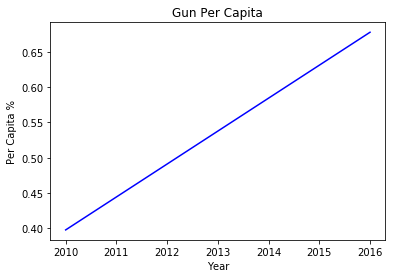

In [82]:
#ploting the change of  gun per capita from 2010 and 2016
PerCapita= [0.39781331523550745, 0.677793404977627]
Year= [2010,2016]
plt.title('Gun Per Capita')
plt.xlabel('Year')
plt.ylabel('Per Capita %')
plt.plot(Year, PerCapita,'blue')
plt.show()

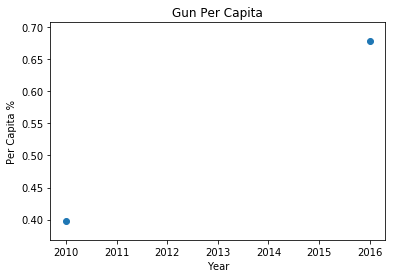

In [83]:
#ploting the relationship of gun per capita for 2010 and 2016
year= [2010,2016]
per_capita= [0.39781331523550745, 0.677793404977627]
x = year
y = per_capita
plt.title('Gun Per Capita')
plt.xlabel('Year')
plt.ylabel('Per Capita %')
plt.scatter(x,y)


Text(0.5,1,'Gun Per Capita')

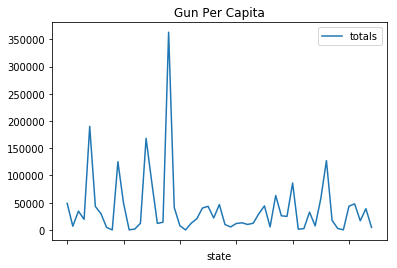

In [84]:
#plot gun per capita in 2016
gun2016.plot(x='state',y='totals',kind='line')
plt.title('Gun Per Capita')


Text(0.5,1,'Gun Per Capita')

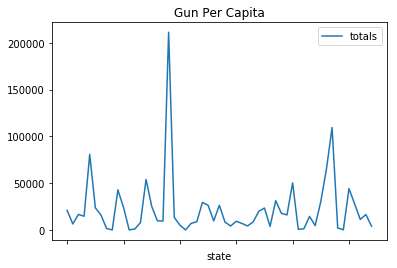

In [85]:
#plot gun per capita in 2010
gun2010.plot(x='state',y='totals',kind='line')
plt.title('Gun Per Capita')


What census data is most associated with high gun per capita?

gun per capita is 0.39809661298171134 % in 2010
gun per capita is 0.677793404977627% in 2016

There is increase in gun per capita from apirl 2010 to july 2016 
SO july 2016 is the most high gun per capita 


### Research Question 2  (Which states have had the highest growth in gun registrations?)

In [86]:
#find the max date value 
monthmax=df_gun1['month'].max
monthmax


<bound method Series.max of 0       2017-09-01
1       2017-09-01
2       2017-09-01
3       2017-09-01
4       2017-09-01
5       2017-09-01
6       2017-09-01
7       2017-09-01
8       2017-09-01
9       2017-09-01
10      2017-09-01
11      2017-09-01
12      2017-09-01
13      2017-09-01
14      2017-09-01
15      2017-09-01
16      2017-09-01
17      2017-09-01
18      2017-09-01
19      2017-09-01
20      2017-09-01
21      2017-09-01
22      2017-09-01
23      2017-09-01
24      2017-09-01
25      2017-09-01
26      2017-09-01
27      2017-09-01
28      2017-09-01
29      2017-09-01
           ...    
12455   1998-11-01
12456   1998-11-01
12457   1998-11-01
12458   1998-11-01
12459   1998-11-01
12460   1998-11-01
12461   1998-11-01
12462   1998-11-01
12463   1998-11-01
12464   1998-11-01
12465   1998-11-01
12466   1998-11-01
12467   1998-11-01
12468   1998-11-01
12469   1998-11-01
12470   1998-11-01
12471   1998-11-01
12472   1998-11-01
12473   1998-11-01
12474   1998-11-01
124

In [87]:
#find the min date value 
monthmin=df_gun1['month'].min()
monthmin

Timestamp('1998-11-01 00:00:00')

In [88]:
#extract the totals of guns and state in the 1998-11-01
gun98= gun3[gun3['month']== '1998-11-01']
gun98


,month,state,totals
12430,1998-11-01,Alabama,1062
12431,1998-11-01,Alaska,145
12432,1998-11-01,Arizona,379
12433,1998-11-01,Arkansas,589
12434,1998-11-01,California,2101
12435,1998-11-01,Colorado,622
12436,1998-11-01,Connecticut,80
12437,1998-11-01,Delaware,55
12438,1998-11-01,District of Columbia,0
12439,1998-11-01,Florida,812


In [89]:
#rename column with year 
gun1998=gun98.rename(columns=lambda x: x[3:] + "_1998")
gun1998

,th_1998,te_1998,als_1998
12430,1998-11-01,Alabama,1062
12431,1998-11-01,Alaska,145
12432,1998-11-01,Arizona,379
12433,1998-11-01,Arkansas,589
12434,1998-11-01,California,2101
12435,1998-11-01,Colorado,622
12436,1998-11-01,Connecticut,80
12437,1998-11-01,Delaware,55
12438,1998-11-01,District of Columbia,0
12439,1998-11-01,Florida,812


In [90]:
#extract the totals of gun and state in the 2017-09-01
gun17= gun3[gun3['month']== '2017-09-01']
gun17

,month,state,totals
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506
5,2017-09-01,Colorado,35873
6,2017-09-01,Connecticut,12117
7,2017-09-01,Delaware,3502
8,2017-09-01,District of Columbia,61
9,2017-09-01,Florida,77390


In [91]:
#rename column with year
gun2017=gun17.rename(columns=lambda x :x[:3] +"_2017")
gun2017

,mon_2017,sta_2017,tot_2017
0,2017-09-01,Alabama,32019
1,2017-09-01,Alaska,6303
2,2017-09-01,Arizona,28394
3,2017-09-01,Arkansas,17747
4,2017-09-01,California,123506
5,2017-09-01,Colorado,35873
6,2017-09-01,Connecticut,12117
7,2017-09-01,Delaware,3502
8,2017-09-01,District of Columbia,61
9,2017-09-01,Florida,77390


In [92]:
#sort the value of totals in 2017
gun2017.sort_values(by=['tot_2017'],inplace=True)
gun2017

,mon_2017,sta_2017,tot_2017
49,2017-09-01,Virgin Islands,9
21,2017-09-01,Mariana Islands,16
8,2017-09-01,District of Columbia,61
11,2017-09-01,Guam,135
41,2017-09-01,Puerto Rico,791
12,2017-09-01,Hawaii,948
42,2017-09-01,Rhode Island,1799
48,2017-09-01,Vermont,3084
7,2017-09-01,Delaware,3502
54,2017-09-01,Wyoming,4281


sort the value of totals and the kentucky was the highest value in 2017

so the highest state in gun registration is Kentucky by total 398706 in 2017-09-01
and kentucky has 840 gun registration in 1998-11-01


gun registration growth equal the difference between  gun registration in 2017 and gun registration in 1998 

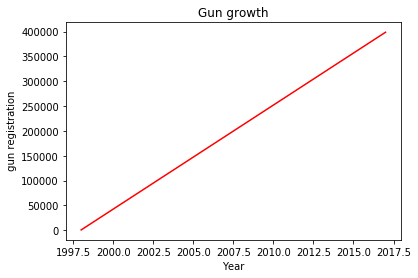

In [93]:
#ploting the relationship of gun registration in kentucky in year 1998 and 2017
gun= [840, 398706]
Year= [1998,2017]
plt.title('Gun growth')
plt.xlabel('Year')
plt.ylabel(' gun registration')
plt.plot(Year, gun,'red')
plt.show()

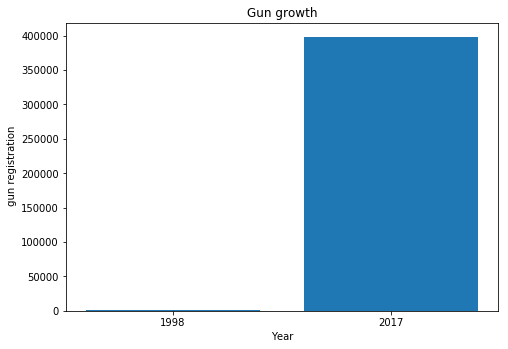

In [94]:
#ploting  of gun registration in kentucky in year 1998 and 2017
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
year = ['1998', '2017']
gun  = [840,398706]
plt.title('Gun growth')
plt.xlabel('Year')
plt.ylabel(' gun registration')
ax.bar(year,gun)
plt.show()

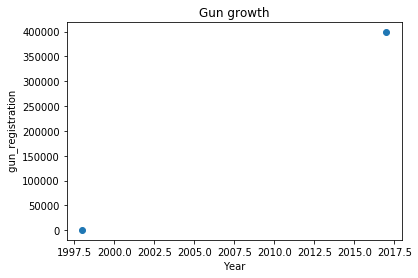

In [95]:
year= [1998,2017]
gun  = [840,398706]
x = year
y = gun
plt.title('Gun growth')
plt.xlabel('Year')
plt.ylabel(' gun_registration')
plt.scatter(x,y)

Which states have had the highest growth in gun registrations?
 the state have had the highest growth in gun registration is Kentucky

# Research Question 3  (What is the overall trend of gun purchases)

In [96]:
#create the new dataframe of NICS data contain month, handgun and long_gun
guntrend= df_gun1[['month','handgun','long_gun']]
guntrend.head()


,month,handgun,long_gun
0,2017-09-01,5734.0,6320.0
1,2017-09-01,2320.0,2930.0
2,2017-09-01,11063.0,7946.0
3,2017-09-01,4347.0,6063.0
4,2017-09-01,37165.0,24581.0


In [97]:
#extract the data in 2017-01-01
gun5= guntrend[guntrend['month']== '2017-01-01']
gun5


,month,handgun,long_gun
440,2017-01-01,6770.0,6572.0
441,2017-01-01,2028.0,1631.0
442,2017-01-01,12108.0,7353.0
443,2017-01-01,5174.0,5278.0
444,2017-01-01,41516.0,22686.0
445,2017-01-01,17189.0,11864.0
446,2017-01-01,6133.0,2115.0
447,2017-01-01,1815.0,1466.0
448,2017-01-01,69.0,6.0
449,2017-01-01,51599.0,21867.0


In [98]:
#totals of handgun
handgunt=gun5['handgun'].sum()
handgunt

562597.0

In [99]:
#total of long_gun
long_gunt=gun5['long_gun'].sum()
long_gunt

366099.0

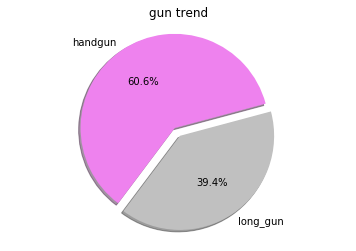

In [100]:
#ploting the relationship of handgun and long_gun
gun = [562597.0,366099.0]
gun_trend = 'handgun','long_gun'
my_colors = ['violet','silver']
my_explode = (0, 0.1)
plt.pie(gun, labels=gun_trend, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('gun trend')
plt.axis('equal')
plt.show()


Text(0.5,1,'gun trend handgun')

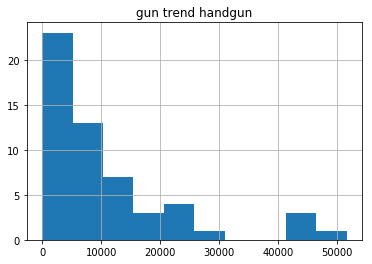

In [101]:
#hist of handgun
gun5['handgun'].hist();
plt.title('gun trend handgun')


Text(0.5,1,'gun trend long_gun')

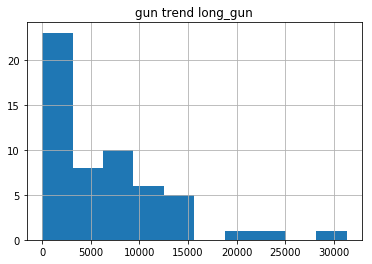

In [102]:
#hist of long_gun
gun5['long_gun'].hist();
plt.title('gun trend long_gun')


Text(0.5,1,'gun trend handgun')

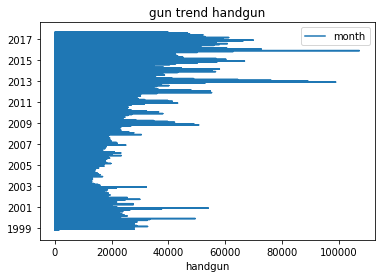

In [103]:
#plot of relationship between handgun and years
guntrend.plot(x='handgun', y='month',kind='line')
plt.title('gun trend handgun')


Text(0.5,1,'gun trend long_gun')

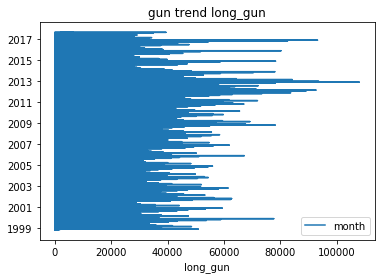

In [104]:
#plot of relationship between long_gun and years 
guntrend.plot(x='long_gun', y='month',kind='line')
plt.title('gun trend long_gun')


# What is the overall trend of gun purchases?
the handgun is the trend of gun purchases
in 2017 the total number of handgun purchases is 562597.0 vs a 366099.0 long_gun purchases by        a percentage 60.6% 



https://datatofish.com/pie-chart-matplotlib/

# <a id='conclusions'></a>
## Conclusions

>both datasets share similar columns, such as the date and the states columns
gun per capita is 0.39809661298171134 % in 2010
gun per capita is 0.677793404977627% in 2016
so there is increase in total gun per capita from 2010 untill 2016 by approximetly 70% 
the state have had the highest growth in gun registration is Kentucky by total 398706 in 2017 vs 840 in 1998 
the handgun is the trend of gun purchases in 2017 the total number of handgun purchases is 562597.0 vs a 366099.0 long_gun purchases by a percentage 60.6%

limitations

 For the Census dataset, there ware missing data that might contribute in the analysis accuracy, such as the five addressed colonies; District of Columbia, Guam, Mariana Islands, Puerto Rico and Virgin Islands.It would have been better if they were included in order to calculate the gun per capita appropriately and check the results.
Finally, at the time of this project the gun dataset was up to date, but not complete. I think it would be better to updata the dataset once the year is over and check if the results would change

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [105]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255